# Aykırı Değer
aykırı değere aykırı değer, aykırı değeri barindıran gözlemede aykırı gözlem denir :))

>Aykırı gözlem **Genellenebilirkik** kaygısı ile oluşturulan **kural setlerini** ya da **fonksiyonları** yanıltır, **yanlılığa** sebep olur.

### Aykırı gözlem nasıl tanımlanır
### Kime Göre Neye Göre Aykırı?
* Sektör Bilgisi    

* ortalam + std.sapma : Standard sapmanın duruma göre 2 yada 3 katıda eklenbilir. bu değerşn üzerinde kalanlar aykırı kabul edilir

* Z- Skoru yaklaşımı : Önce veri seti standartlaştırılır sonra sağından ve solundan +-2.5 sınırı konur ve sınırların altında ve üstünde kalnlar aykırıdır

* Boxplot (interquartile range - IQR) yöntemi : çeyrekler(Q1,Q3) göre işlem yapılır. IQR=1.5*(Q3-Q1) üst eşik değer=Q1-IQR alt eşik değer=Q3+IQR olur


Genelde 1 ve 4. maddeler kullanılır

sektör bilgisi yoksa tek değişkenli olarak inceliyorsak boxplot kullanılır

In [31]:
import seaborn as sns
data=sns.load_dataset("diamonds")
df=data.copy()
df=df.select_dtypes(include=["int64","float64"])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [32]:
table=df["table"]
table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

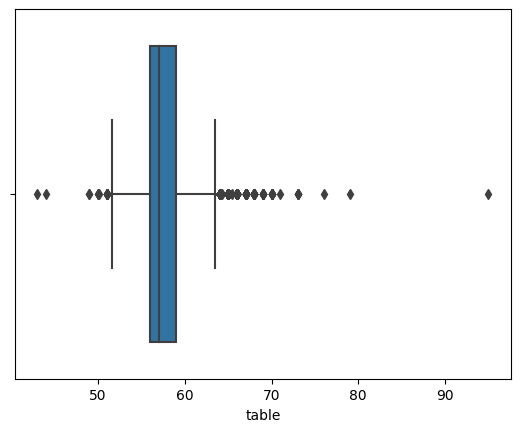

In [4]:
sns.boxplot(x=table);

In [33]:
Q1=table.quantile(0.25)
Q3=table.quantile(0.75)
IQR=Q3-Q1

In [6]:
print(Q1,Q3)
IQR

56.0 59.0


3.0

In [34]:
bottom=Q1-1.5*IQR
top=Q3+1.5*IQR

In [8]:
print(bottom,top)
#Görüldüğü üzere zaten kutu grafiği bize bu sınırları gösteriyor

51.5 63.5


In [9]:
oulier=((table<bottom))
table[oulier].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

## Aykırı Değer Problemini Çözme
* Silme
* Ortalama ile doldurma
* Baskılama

In [10]:
type(table)

pandas.core.series.Series

In [11]:
import pandas as pd

In [13]:
table=pd.DataFrame(table)

In [15]:
table.shape

(53940, 1)

#### Silme

In [25]:
table_pure=table[~((table<bottom) | (table>top)).any(axis=1)]

In [17]:
table_pure.shape

(53335, 1)

#### Ortalama ile doldurma

In [18]:
table_pure[:]=table.mean()

In [30]:
table_pure

,table
0,57.457184
1,57.457184
3,57.457184
4,57.457184
5,57.457184
...,...
53935,57.457184
53936,57.457184
53937,57.457184
53938,57.457184


#### Baskılama


üstt aykırılar üst sınıra 

alt ayj-kırılar alt aykırıya eşitlenir

In [37]:
table_t=table>top
table_b=table<bottom

In [38]:
table[table_b]=bottom
table[table_t]=top

/var/folders/09/145085653lg5n_gp0jh5fh240000gn/T/ipykernel_1260/288664661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[table_b]=bottom
/var/folders/09/145085653lg5n_gp0jh5fh240000gn/T/ipykernel_1260/288664661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[table_t]=top


In [43]:
table[table_b]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64